# Intro to Programming: Extracurricular - Data Analysis

## Investigate a Dataset: Soccer Database

### Section 1: Introduction to Data

### Section 2: Data Wrangling & Cleaning

### Section 3: Exploration of Data & Analysis

### Section 4: Conclusions


### Section 1: Introduction to Data

##### Overview
The data being worked on here was taken from a database housing data about soccer teams, players, and matches in Europe. The downloaded database contains data organized into 7 tables : Country, League, Match, Player, Player_Attributes, Team, and Team_Attributes. This information is from 7 total seasons of soccer, spanning from 2008 to 2015. 

##### Notes on Data
There are a few things about the data that need to be acknowledged. The countries included in the data are limited to 11 countries. Along with the 11 countries, there is only one league per country, the highest level league of that country. Additionally, although team goals are recorded, the match table doesn't include any information on the player that scored the goal. 

### Correlation questions
1. Is player __height__ and __sprint speed__ correlated? (answer: negatively corr, 0.44449925598458095)

2. Is sprint speed correlated with number of goals scored?

3. Does age correlate with sprint speed?



### Interesting Facts from Data

1. Height
    1. Average height
    2. Tallest Player
    3. Shortest Player
    4. Graph illustrating all players' heights

2. Age
    1. Average Age
    2. Oldest Player
    3. Youngest Player
    4. Graph illustrating all players' ages

3. Goals
    1. Most Goals scored by an away team
        1 How many goals?
        2 Who was the team that did it?
        3 Who did they do it against?
        4 When did it occur?
    2. Most goals scored by a home team
        1 How many goals?
        2 Who was the team that did it?
        3 Who did they do it against?
        4 When did it occur?
    3. Most goals scored overall in season
    4. Least goals scored by team in season
    5. Top scoring teams by year of my choosing
    6. Table showing all season and top ten scoring
        1. Goal amounts for top ten scoring teams
        2. Team names for top ten scoring teams
    7. Sum of top ten scoring teams' goals and how its changed by season, illustrated by graph
    8. Show me the # of seasons each team has been in the top 10 scoring 
    9. Show me the change in total scoring for the top two scoring teams in last 8 seasons
    



#### Data Wrangling and Cleaning

    
    

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

conn = sqlite3.connect('database.sqlite')

Player = pd.read_sql("SELECT * FROM Player", conn)
Player_Attributes = pd.read_sql("SELECT * FROM Player_Attributes", conn)
Country = pd.read_sql("SELECT * FROM country", conn)
League = pd.read_sql("SELECT * FROM league", conn)
Match = pd.read_sql("SELECT * FROM match", conn)
Team = pd.read_sql("SELECT * FROM team", conn)
Team_Attributes = pd.read_sql("SELECT * FROM team_attributes", conn)

Complete_Team = pd.merge(Team, Team_Attributes, on = "team_api_id")
Complete_Team = Complete_Team.drop_duplicates(subset = "team_api_id")

Complete_Player = pd.merge(Player, Player_Attributes, on = "player_api_id")
Complete_Player = Complete_Player.drop_duplicates(subset = "player_name")

#adding 'age' column to Complete_Player dataframe
bday_array = Complete_Player['birthday'].values
dates_list = [dt.strptime(date, "%Y-%m-%d %H:%M:%S").date() for date in bday_array]#this stores datetime objects
bday_years = []
counter = 0
while counter < len(dates_list):
    bday_years.append(dates_list[counter].year)  #this fills bday_years[] with years
    counter += 1

age_array = []
x = 0 
while x < len(dates_list):
    age_array.append(2018-bday_years[x]) # 2018 - year born
    x +=1
Complete_Player['age'] = age_array

conn.commit
conn.close

<function Connection.close>

In [11]:
### creating dataframe to house only goal related columns from the Match dataframe
goals_scored_df = pd.DataFrame()
goals_scored_df['home team goals'] = Match.home_team_goal.values
goals_scored_df['home team id'] = Match.home_team_api_id
goals_scored_df['season'] = Match.season
goals_scored_df['away team goals'] = Match.away_team_goal.values
goals_scored_df['away team id'] = Match.away_team_api_id


### creating dataframes to store data retrieved from goals scored dataframe
home_team_goals_scored_2008 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2008 = pd.DataFrame(columns = ['away team goals','away team id'])

home_team_goals_scored_2009 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2009 = pd.DataFrame(columns = ['away team goals','away team id'])

home_team_goals_scored_2010 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2010 = pd.DataFrame(columns = ['away team goals','away team id'])

home_team_goals_scored_2011 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2011 = pd.DataFrame(columns = ['away team goals','away team id'])

home_team_goals_scored_2012 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2012 = pd.DataFrame(columns = ['away team goals','away team id'])

home_team_goals_scored_2013 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2013 = pd.DataFrame(columns = ['away team goals','away team id'])

home_team_goals_scored_2014 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2014 = pd.DataFrame(columns = ['away team goals','away team id'])

home_team_goals_scored_2015 = pd.DataFrame(columns = ['home team goals','home team id'])
away_team_goals_scored_2015 = pd.DataFrame(columns = ['away team goals','away team id'])

### housing dataframes in an array, to be used with if else statement
home_team_goals_array_of_dfs = [home_team_goals_scored_2008, home_team_goals_scored_2009,
                               home_team_goals_scored_2010, home_team_goals_scored_2011,
                               home_team_goals_scored_2012, home_team_goals_scored_2013,
                               home_team_goals_scored_2014, home_team_goals_scored_2015]
away_team_goals_array_of_dfs = [away_team_goals_scored_2008, away_team_goals_scored_2009,
                               away_team_goals_scored_2010, away_team_goals_scored_2011,
                               away_team_goals_scored_2012, away_team_goals_scored_2013,
                               away_team_goals_scored_2014, away_team_goals_scored_2015]

### array holding seasons as they appear in goals scored df, using in if else statement
seasons_array = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', 
                 '2013/2014', '2014/2015', '2015/2016']

### going through goals scored df and adding home team goal columns to correct season df
for index, row in goals_scored_df.iterrows():
    if row['season'] == seasons_array[0]:
        home_team_goals_array_of_dfs[0].loc[index] = row
        away_team_goals_array_of_dfs[0].loc[index] = row
        
    elif row['season'] == seasons_array[1]:
        home_team_goals_array_of_dfs[1].loc[index] = row
        away_team_goals_array_of_dfs[1].loc[index] = row
        
    elif row['season'] == seasons_array[2]:
        home_team_goals_array_of_dfs[2].loc[index] = row
        away_team_goals_array_of_dfs[2].loc[index] = row
        
    elif row['season'] == seasons_array[3]:
        home_team_goals_array_of_dfs[3].loc[index] = row
        away_team_goals_array_of_dfs[3].loc[index] = row
        
    elif row['season'] == seasons_array[4]:
        home_team_goals_array_of_dfs[4].loc[index] = row
        away_team_goals_array_of_dfs[4].loc[index] = row
        
    elif row['season'] == seasons_array[5]:
        home_team_goals_array_of_dfs[5].loc[index] = row
        away_team_goals_array_of_dfs[5].loc[index] = row
        
    elif row['season'] == seasons_array[6]:
        home_team_goals_array_of_dfs[6].loc[index] = row
        away_team_goals_array_of_dfs[6].loc[index] = row
        
    elif row['season'] == seasons_array[7]:
        home_team_goals_array_of_dfs[7].loc[index] = row
        away_team_goals_array_of_dfs[7].loc[index] = row

### creating total goals dataframes to store home and away total goals grouped by team 
total_goals_2008 = pd.concat((home_team_goals_array_of_dfs[0].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[0].groupby('away team id').sum()), axis = 1)
total_goals_2009 = pd.concat((home_team_goals_array_of_dfs[1].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[1].groupby('away team id').sum()), axis = 1)
total_goals_2010 = pd.concat((home_team_goals_array_of_dfs[2].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[2].groupby('away team id').sum()), axis = 1)
total_goals_2011 = pd.concat((home_team_goals_array_of_dfs[3].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[3].groupby('away team id').sum()), axis = 1)
total_goals_2012 = pd.concat((home_team_goals_array_of_dfs[4].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[4].groupby('away team id').sum()), axis = 1)
total_goals_2013 = pd.concat((home_team_goals_array_of_dfs[5].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[5].groupby('away team id').sum()), axis = 1)
total_goals_2014 = pd.concat((home_team_goals_array_of_dfs[6].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[6].groupby('away team id').sum()), axis = 1)
total_goals_2015 = pd.concat((home_team_goals_array_of_dfs[7].groupby('home team id').sum(),
                            away_team_goals_array_of_dfs[7].groupby('away team id').sum()), axis = 1)

total_goals_array_of_seasons = [total_goals_2008,total_goals_2009,total_goals_2010,
                               total_goals_2011,total_goals_2012,total_goals_2013,
                               total_goals_2014,total_goals_2015]


### adding third column to total goals dataframe that stores sum of away and home goals
counter = 0
while counter < len(total_goals_array_of_seasons):
    total_goals_array_of_seasons[counter]['total goals'] = total_goals_array_of_seasons[counter]['home team goals'] + total_goals_array_of_seasons[counter]['away team goals']
    counter +=1

### Correlation questions
1. Is player __height__ and __sprint speed__ correlated? (answer: negatively corr, 0.44449925598458095)

2. Is sprint speed correlated with number of goals scored?

3. Does age correlate with sprint speed?


In [65]:
### function created to return correlation between two series
def correlation(x,y):
    std_x = (x - x.mean()) / x.std(ddof = 0)
    std_y = (y - y.mean()) / y.std(ddof = 0)
    
    return (std_x * std_y).mean()


'1'
one = correlation(Complete_Player.height, Complete_Player.sprint_speed)
print("Player height and player sprint speed have a negative correlation of: " + str("%.3f" % one))

'2'
two = correlation(Complete_Player.strength, Complete_Player.height)
print("Player strength and player height have a positive correlation of: " + str("%.3f" % two))


'3'
three = correlation(Complete_Player.age, Complete_Player.sprint_speed)
print("Player age and player sprint speed have a negative correlation of: " + str("%.3f" % three))

Player height and player sprint speed have a negative correlation of: -0.444
Player strength and player height have a positive correlation of: 0.580
Player age and player sprint speed have a negative correlation of: -0.370


### Interesting Facts from Data

#### Height
    1 - Average height
    2 - Tallest Player
    3 - Shortest Player
    4 - Graph illustrating all players' heights


Average height = 181 cm.
The tallest player is ['Kristof van Hout']. He is 208 cm tall.
The shortest player is ['Juan Quero']. He is 157 cm tall.


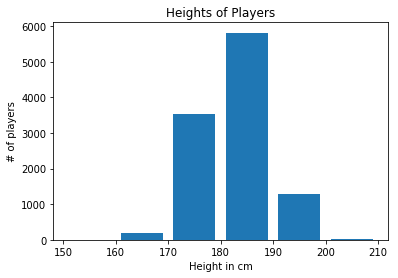

In [10]:
def getAverageTallestShortestHeights():
    print("Average height = " + str(int(Complete_Player.height.mean())) + " cm.")

    Tallest_Player_Info = Complete_Player.loc[Complete_Player['height'] == Complete_Player.height.max(), 'player_name']
    print("The tallest player is " + str(Tallest_Player_Info.values) + ". He is " + str(int(Complete_Player.height.max())) + " cm tall." )

    Shortest_Player_Info = Complete_Player.loc[Complete_Player['height'] == Complete_Player.height.min(), 'player_name']
    print("The shortest player is " + str(Shortest_Player_Info.values) + ". He is " + str(int(Complete_Player.height.min())) + " cm tall." )

def graphPlayerHeights():
    bins = [150, 160, 170, 180, 190, 200, 210]
    plt.hist(Complete_Player.height.values, bins, histtype='bar', rwidth=0.8)
    plt.xlabel('Height in cm')
    plt.ylabel('# of players')
    plt.title("Heights of Players")
    plt.show()

getAverageTallestShortestHeights()
graphPlayerHeights()

#### Age
    1 - Average Age
    2 - Oldest Player
    3 - Youngest Player
    4 - Graph illustrating all players' ages


The average age of all players is 31 years old.
The mode age of all players is 30 years old.
The median age of all players is 31 years old.
The oldest player is ['Alberto Fontana']. He is 51 years old.
The youngest player is ['Alban Lafont' 'Gianluigi Donnarumma' 'Jonathan Leko']. They are all 19 years old.


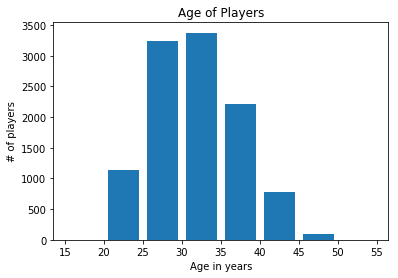

In [7]:
def playerAgeAverageModeMedian():
    average_age_of_players = Complete_Player.age.mean()
    print("The average age of all players is " + str(int(average_age_of_players)) + " years old.")
    mode_age_of_all_players = Complete_Player.age.mode()
    print("The mode age of all players is " + str(int(mode_age_of_all_players)) + " years old.")
    median_age_of_all_players = Complete_Player.age.median()
    print("The median age of all players is " + str(int(median_age_of_all_players)) + " years old.")

def oldestAndYoungestPlayers():
    oldest_player = Complete_Player.age.max()
    oldest_player_name = Complete_Player.loc[Complete_Player['age'] == oldest_player, 'player_name']
    print("The oldest player is " + str(oldest_player_name.values) + ". He is " + str(int(oldest_player)) + " years old.")

    youngest_player = Complete_Player.age.min()
    youngest_player_name = Complete_Player.loc[Complete_Player['age'] == youngest_player, 'player_name']
    print("The youngest player is " + str(youngest_player_name.values) + ". They are all " + str(int(youngest_player)) + " years old.")
    
def graphThatShowsPlayerAges():
    bins = [15, 20, 25, 30, 35, 40, 45, 50, 55]
    plt.hist(Complete_Player.age.values, bins, histtype='bar', rwidth=0.8)
    plt.xlabel('Age in years')
    plt.ylabel('# of players')
    plt.title("Age of Players")
    plt.show()
    

playerAgeAverageModeMedian()
oldestAndYoungestPlayers()
graphThatShowsPlayerAges()

#### Goals 
    1. Most Goals scored by an away team
        a - How many goals?
        b - Who was the team that did it?
        c - Who did they do it against?
        d - When did it occur?
    

In [15]:
def awayTeamMostGoalsScoredDetail():
    print("The most goals scored by an away team is " + str(Match.away_team_goal.max()) + " goals.")

    most_away_goals_team_apis = Match.loc[Match['away_team_goal'] == Match.away_team_goal.max()].away_team_api_id.values
    most_away_goals_team_name = Complete_Team.loc[Complete_Team['team_api_id'] == int(most_away_goals_team_apis), 'team_long_name']
    print("The team that did this was " + str(most_away_goals_team_name.values))

    team_let_up_most_away_team_goals = Match.loc[Match['away_team_goal'] == Match.away_team_goal.max()].home_team_api_id
    team_name_let_up_most_away_team_goals = Complete_Team.loc[Complete_Team['team_api_id'] == int(team_let_up_most_away_team_goals)].team_long_name
    print("The home team that let this happen was " + str(team_name_let_up_most_away_team_goals.values))
    print("This happend on " + str(Match.loc[Match['away_team_goal'] == Match.away_team_goal.max()].date.values))

awayTeamMostGoalsScoredDetail()

The most goals scored by an away team is 9 goals.
The team that did this was ['Paris Saint-Germain']
The home team that let this happen was ['ES Troyes AC']
This happend on ['2016-03-13 00:00:00']


#### Goals  (cont'd)

    2. Most goals scored by a home team
        a - How many goals?
        b - Who was the team that did it?
        c - Who did they do it against?
        d - When did it occur?

In [19]:
def homeTeamMostGoalsScoredDetail():
    
    print("The most goals scored by a home team is " + str(Match.home_team_goal.max()) + " goals.")

    most_home_goals_team_apis = Match.loc[Match['home_team_goal'] == Match.home_team_goal.max()].home_team_api_id.values
    most_home_goals_team_name = Complete_Team.loc[Complete_Team['team_api_id'] == int(most_home_goals_team_apis[0]), 'team_long_name']
    most_home_goals_team_name2 = Complete_Team.loc[Complete_Team['team_api_id'] == int(most_home_goals_team_apis[1]), 'team_long_name']
    print("The team that did this was " + str(most_home_goals_team_name.values) + " and " + str(most_home_goals_team_name2.values))

    teams_let_up_most_home_team_goals = Match.loc[Match['home_team_goal'] == Match.home_team_goal.max()].away_team_api_id
    team_name_let_up_most_home_team_goals = Complete_Team.loc[Complete_Team['team_api_id'] == int(teams_let_up_most_home_team_goals.values[0])].team_long_name
    team_name_let_up_most_home_team_goals2 = Complete_Team.loc[Complete_Team['team_api_id'] == int(teams_let_up_most_home_team_goals.values[1])].team_long_name
    print("The away teams that let this happen were " + str(team_name_let_up_most_home_team_goals.values) +
         " and " + str(team_name_let_up_most_home_team_goals2.values))

    print("This happend on " + str(Match.loc[Match['home_team_goal'] == Match.home_team_goal.max()].date.values))
    
homeTeamMostGoalsScoredDetail()    

The most goals scored by a home team is 10 goals.
The team that did this was ['PSV'] and ['Real Madrid CF']
The away teams that let this happen were ['Feyenoord'] and ['Rayo Vallecano']
This happend on ['2010-10-24 00:00:00' '2015-12-20 00:00:00']


#### Goals  (cont'd)   
    3. Most goals scored overall in season
    4. Least goals scored by team in season
    5. Top scoring teams by year of my choosing
    6. Table showing all season and top ten scoring
        a - Goal amounts for top ten scoring teams
        b - Team names for top ten scoring teams
    7. Sum of top ten scoring teams' goals and how its changed by season, illustrated by graph
    8. Show me the # of seasons each team has been in the top 10 scoring 
    9. Show me the change in total scoring for the top two scoring teams in last 8 seasons


#### Goals (cont'd)

    3. Most goals scored overall in season


In [21]:
def mostGoalsInSeason():
    max_goals = 0
    counter = 0
    ### check each total goals dataframe and looking for highest season goals total
    while counter < len(total_goals_array_of_seasons):
        if total_goals_array_of_seasons[counter]['total goals'].max() > max_goals:
            max_goals = total_goals_array_of_seasons[counter]['total goals'].max()
        counter += 1
    print("The most amount of goals scored by a team in a season is " + str(max_goals))

mostGoalsInSeason()

#### Goals  (cont'd)

    4. Least goals scored by team in season


In [44]:
def leastGoalsInSeason():
    min_goals = max_goals
    counter = 0
    ### check each total goals dataframe and looking for lowest season goals total
    while counter < len(total_goals_array_of_seasons):
        if total_goals_array_of_seasons[counter]['total goals'].max() < min_goals:
            min_goals = total_goals_array_of_seasons[counter]['total goals'].min()
        counter += 1
    print("The least amount of goals scored by a team in a season is " +str(min_goals))

leastGoalsInSeason()

The least amount of goals scored by a team in a season is 17


#### Goals  (cont'd)

    5. Top scoring teams by year of my choosing


In [47]:
def getTopScoringTeams(year):
    table = pd.DataFrame()
    if year == 2008:
        table = total_goals_2008.nlargest(10, 'total goals', keep = 'first')
    elif year == 2009:
        table = total_goals_2009.nlargest(10, 'total goals', keep = 'first')
    elif year == 2010:
        table = total_goals_2010.nlargest(10, 'total goals', keep = 'first')
    elif year == 2011:
        table = total_goals_2011.nlargest(10, 'total goals', keep = 'first')
    elif year == 2012:
        table = total_goals_2012.nlargest(10, 'total goals', keep = 'first')
    elif year == 2013:
        table = total_goals_2013.nlargest(10, 'total goals', keep = 'first')
    elif year == 2014:
        table = total_goals_2014.nlargest(10, 'total goals', keep = 'first')
    elif year == 2015:
        table = total_goals_2015.nlargest(10, 'total goals', keep = 'first')
    print(table)



getTopScoringTeams(2014)

      home team goals  away team goals  total goals
8633               65               53          118
8634               64               46          110
8640               50               42           92
9772               48               38           86
9925               50               34           84
9931               43               41           84
8456               44               39           83
9847               52               31           83
9823               46               34           80
8592               40               36           76


#### Goals  (cont'd)

    6. Table showing all season and top ten scoring
        a - Goal amounts for top ten scoring teams
        b - Team names for top ten scoring teams


In [22]:
'a'
### creating dataframe that shows ALL SEASONS and the goals scored for top 10 scoring teams by season
def getTopScoringTeams():
    all_seasons_top_scoring = pd.DataFrame({
        '2008': pd.Series(total_goals_2008['total goals']).nlargest(10).values,
        '2009': pd.Series(total_goals_2009['total goals']).nlargest(10).values,
        '2010': pd.Series(total_goals_2010['total goals']).nlargest(10).values,
        '2011': pd.Series(total_goals_2011['total goals']).nlargest(10).values,
        '2012': pd.Series(total_goals_2012['total goals']).nlargest(10).values,
        '2013': pd.Series(total_goals_2013['total goals']).nlargest(10).values,
        '2014': pd.Series(total_goals_2014['total goals']).nlargest(10).values,
        '2015': pd.Series(total_goals_2015['total goals']).nlargest(10).values,
    })

'b'
### function to match team long name to team api id
def getTeamName(index):
    team_long_name = Complete_Team['team_long_name'].loc[Complete_Team['team_api_id'] == index].values
    return team_long_name
def getTeamNames(df):
    return df.applymap(getTeamName)
### creating dataframe that shows ALL SEASONS and team names for top 10 scoring teams by season
all_seasons_top_scoring_teams = pd.DataFrame({
    '2008': pd.Series(total_goals_2008['total goals']).nlargest(10).index,
    '2009': pd.Series(total_goals_2009['total goals']).nlargest(10).index,
    '2010': pd.Series(total_goals_2010['total goals']).nlargest(10).index,
    '2011': pd.Series(total_goals_2011['total goals']).nlargest(10).index,
    '2012': pd.Series(total_goals_2012['total goals']).nlargest(10).index,
    '2013': pd.Series(total_goals_2013['total goals']).nlargest(10).index,
    '2014': pd.Series(total_goals_2014['total goals']).nlargest(10).index,
    '2015': pd.Series(total_goals_2015['total goals']).nlargest(10).index,
})

getTopScoringTeams()
getTeamNames(all_seasons_top_scoring_teams)


NameError: name 'total_goals_2008' is not defined

#### Goals  (cont'd)
    7. Sum of top ten scoring teams' goals and how its changed by season, illustrated by graph


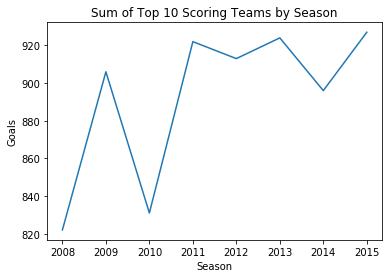

In [75]:
### getting sum of top ten scoring teams goal totals by season
seasons = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
top_ten_goals_totals_by_seasons = [pd.Series(total_goals_2008['total goals']).nlargest(10).values.sum(),
                                  pd.Series(total_goals_2009['total goals']).nlargest(10).values.sum(),
                                  pd.Series(total_goals_2010['total goals']).nlargest(10).values.sum(),
                                  pd.Series(total_goals_2011['total goals']).nlargest(10).values.sum(),
                                  pd.Series(total_goals_2012['total goals']).nlargest(10).values.sum(),
                                  pd.Series(total_goals_2013['total goals']).nlargest(10).values.sum(),
                                  pd.Series(total_goals_2014['total goals']).nlargest(10).values.sum(),
                                  pd.Series(total_goals_2015['total goals']).nlargest(10).values.sum()]

### graph that shows how the total amount of goals scored by top 10 teams has changed by season
plt.plot(seasons,top_ten_goals_totals_by_seasons)
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Sum of Top 10 Scoring Teams by Season')
plt.show()

#### Goals  (Cont'd)

       8. Show me the # of seasons each team has been in the top 10 scoring 


In [55]:
counted = []
seen_again = []
total_count_of_team = []
seasons_counting_teams = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
x = 0
while x < len(seasons_counting_teams):
    for item in all_seasons_top_scoring_teams[seasons_counting_teams[x]]:
        if item not in counted:
            counted.append(item)
        elif item in counted:
            seen_again.append(item)
    x+=1

for x in counted:
    total_count_of_team.append(seen_again.count(x))

total_count_of_team = np.array(total_count_of_team)
total_count_of_team = total_count_of_team + 1

times_in_top_ten = pd.DataFrame(data = {'team id': counted, 'count': total_count_of_team})
times_in_top_ten.sort_values('count', ascending = False)
count = 0
while count < len(counted):
    times_in_top_ten.loc[times_in_top_ten['team id'] == counted[count], 'team name'] = Complete_Team.loc[Complete_Team['team_api_id'] == counted[count], 'team_long_name'].values
    count +=1

times_in_top_ten.sort_values('count', ascending=False)

# def graphTopScoringTeams():
#     plt.barh(times_in_top_ten['team name'], times_in_top_ten['count'])
#     plt.xticks(rotation = 0)
#     plt.title('Top Ten in Scoring \n # of Seasons')
#     plt.show()

,count,team id,team name
0,8,8634,FC Barcelona
2,8,8633,Real Madrid CF
5,7,9925,Celtic
17,5,8640,PSV
21,4,9789,Borussia Dortmund
16,4,9823,FC Bayern Munich
15,4,9772,SL Benfica
13,4,10260,Manchester United
12,4,9931,FC Basel
10,4,8593,Ajax


#### Goals  (cont'd)

    9. Show me the change in total scoring for the top two scoring teams in last 8 seasons


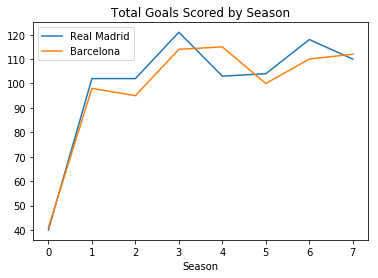

In [166]:
real_madrid = 8633
barcelona = 8634
real_madrid_goals = []
barcelona_goals = []
x =0
#adding season goal totals by season to appropriate list
while x < len(total_goals_array_of_seasons):
    real_madrid_goals.append(total_goals_array_of_seasons[x].loc[real_madrid, 'total goals'])
    barcelona_goals.append(total_goals_array_of_seasons[x].loc[barcelona, 'total goals'])
    x+=1

plt.plot(real_madrid_goals, label = 'Real Madrid')
plt.plot(barcelona_goals, label = 'Barcelona')
plt.legend()
plt.title('Total Goals Scored by Season')
plt.xlabel('Season')

plt.show()
